In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###  classification problem Q he ?
           -  q ke hmara last column condission par he 
              loan dena he ya nahi dena he 
                  [  y  or  N ] 
              is leya - classification problem he     
          __________________________________________
           -  aghar ya huta ke kitna dena he            
              to -  regression problem huti

In [3]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.fillna({
    'Gender': data.Gender.mode()[0],
    'Married': data.Married.mode()[0],
    'Dependents': data.Dependents.mode()[0],
    'Self_Employed': data.Self_Employed.mode()[0],
    'LoanAmount': data.LoanAmount.mean(),
    'Loan_Amount_Term': data.Loan_Amount_Term.mode()[0],
    'Credit_History': data.Credit_History.mode()[0]
}, inplace=True)


In [6]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
data.Gender = data.Gender.apply(lambda x: 1 if x=='Male' else 0)

In [8]:
data.Gender.value_counts()

Gender
1    502
0    112
Name: count, dtype: int64

In [9]:
data.Married.value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [10]:
data.Married.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
data.Married = data.Married.apply(lambda x: 1 if str(x).lower() == "yes" else 0)

In [12]:
data.Married.value_counts()

Married
1    401
0    213
Name: count, dtype: int64

In [13]:
data.Dependents.value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
data.Dependents = data.Dependents.apply(lambda x: 0 if x=='0' else  1 if x=='1' else 2 if x=='2' else 3)

In [15]:
data.Dependents.value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [16]:
data.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [17]:
data.Education = data.Education.apply(lambda x: 1 if x=='Graduate' else 0 )

In [18]:
data.Education.value_counts()

Education
1    480
0    134
Name: count, dtype: int64

In [19]:
data.Self_Employed.value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [24]:
data.Self_Employed = data.Self_Employed.apply(lambda x: 1 if x=='Yes' else 0 )

In [25]:
data.Self_Employed.value_counts()

Self_Employed
0    532
1     82
Name: count, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [28]:
data.Property_Area.value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [30]:
data.Property_Area = data.Property_Area.apply(lambda x: 1 if x=='Rural' else 0)

In [31]:
data.Property_Area.value_counts()

Property_Area
0    435
1    179
Name: count, dtype: int64

In [32]:
data.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [34]:
data.Loan_Status = data.Loan_Status.apply(lambda x : 1 if x=='Y' else 0)

In [35]:
data.Loan_Status.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [36]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


In [37]:
x = data.drop(['Loan_ID','Loan_Status'],axis=1)

In [38]:
y = data.Loan_Status

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

###  LogisticRegression
  -----------------------------
        - LogisticRegression  iske name me regreassion a   
          raha he leken ya regression ka algorithm nahi he 
        -  ya classification algorithm he 
      
        -   Binary classification ( yes or NO )
            aghar isme 2 se zeyada class huti to ya 
            multiclassification huti
___________________________________________

-----------------------------------------------------
__Explain LogisticRegression________________________________________________
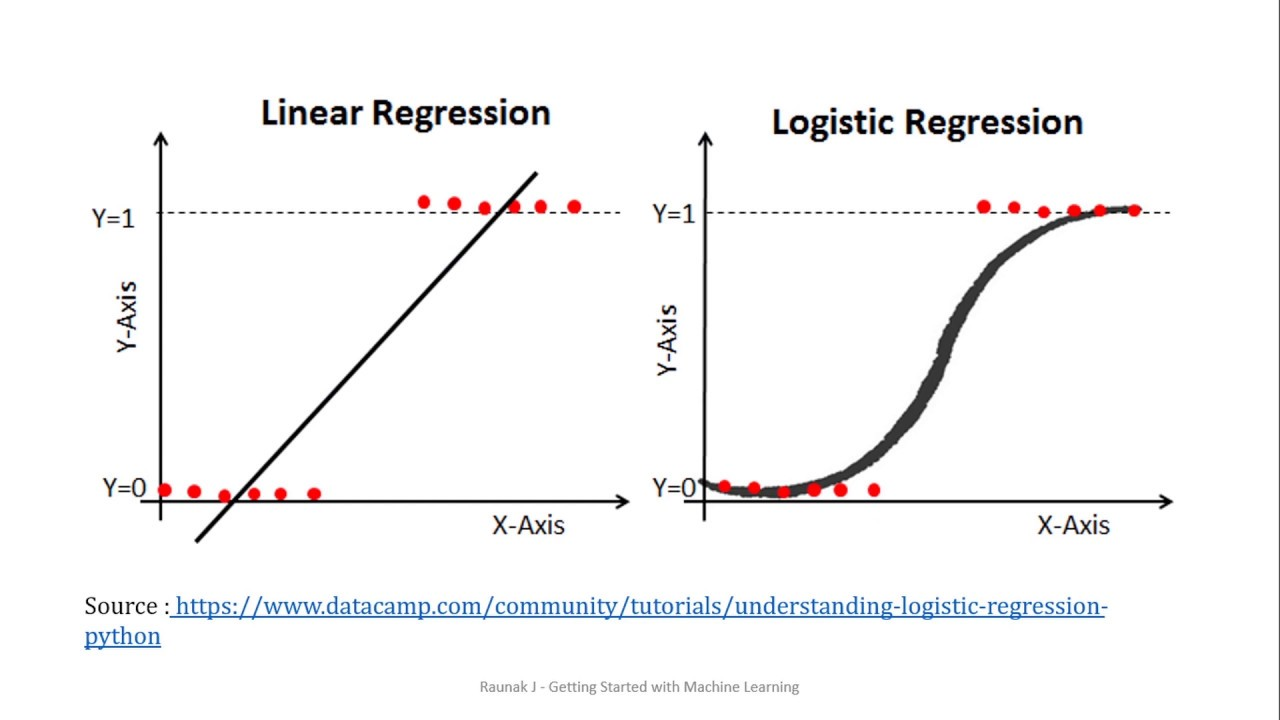

Sigmoid function
-------------------------
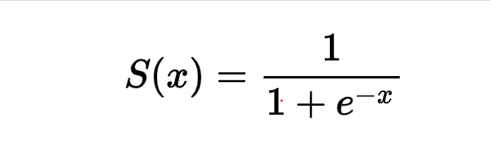
_________isKa Kam he Linear Ko Non Linear me convert Karna

------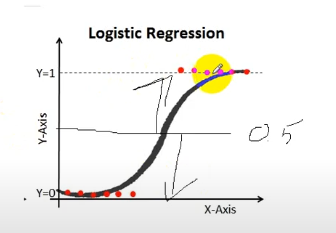
iske bech a jaega thrasboard
 - or ek probability define hu jaega 
 - aghar o.5 se uppar huwa to uppar wali value
   or isse kam huwa to neche wali value

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_r = LogisticRegression()

In [44]:
log_r.fit(x_train,y_train)

C:\Users\SYED ATIF\anaconda3\treaning\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred =log_r.predict(x_train)

In [49]:
pd.DataFrame({'orignal':y_train,'predected':y_pred})

,orignal,predected
90,1,1
533,0,1
452,0,0
355,1,1
266,1,1
...,...,...
277,1,1
9,0,1
359,1,1
192,0,1


In [50]:
count = 0
for t,p in zip(y_train,y_pred):
    if t==p:
        count+=1
acc = count/len(y_train)     
print(f'Model has {acc}% accuracy in training')

Model has 0.8044806517311609% accuracy in training


In [51]:
y_pt = log_r.predict(x_test)

In [53]:
count = 0
for t,p in zip(y_train,y_pred):
    if t==p:
        count+=1
acc = count/len(y_test)     
print(f'Model has {acc}% accuracy in training')

Model has 3.2113821138211383% accuracy in training


# Confusion Matrix 

     Evaluation Metrics
-     we finde 
           accuracy 
           precsion
           recall
           f1 score
           weighted

accuracy score 
-----------------------

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pt)

0.8211382113821138

In [55]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pt))

              precision    recall  f1-score   support

           0       0.79      0.45      0.58        33
           1       0.83      0.96      0.89        90

    accuracy                           0.82       123
   macro avg       0.81      0.71      0.73       123
weighted avg       0.82      0.82      0.80       123



Confusion Matrix
--------------------------

In [56]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test,y_pt))

[[15 18]
 [ 4 86]]


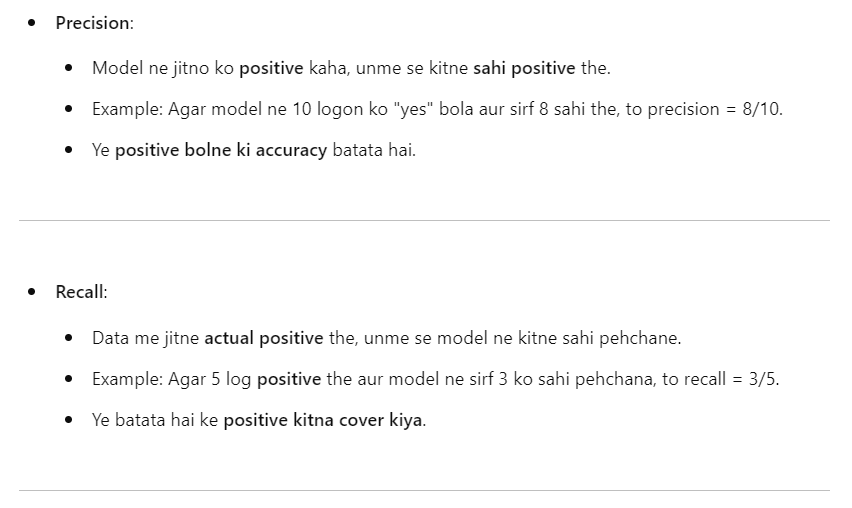
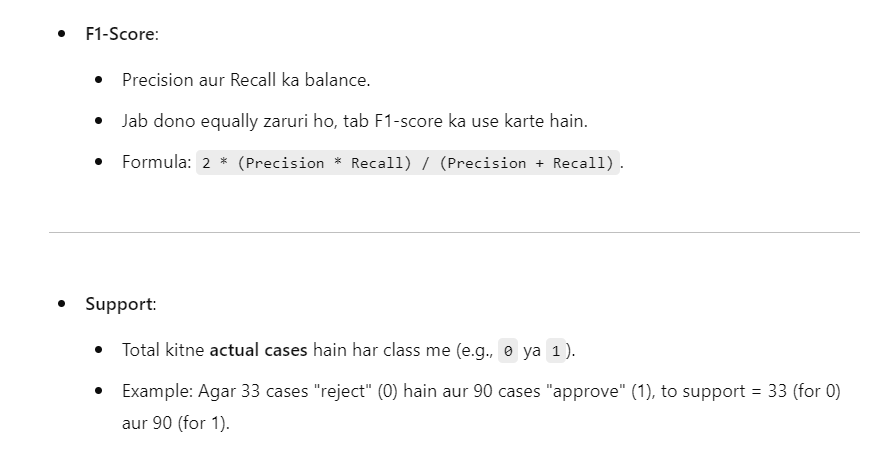